In [25]:
!pip install pandas
!pip install --upgrade tensorflow
!pip install --upgrade scikit-learn
!pip install re
!pip install pickle5

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


<h2 align="center">Sentiment Analysis <h2>
<h3 align = "center">Natural Language Processing<h3>


In [3]:
#Import required Libraries
import pandas as pd
import re
import pickle5 as pickle

#Libraies to clean the data
import nltk
from nltk.corpus import stopwords

#library for data Visualization
import wordcloud
import matplotlib.pyplot as plt

#library and function for tokanization and vectorization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Importing libraries to build our models
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Dropout, Embedding, Flatten, GRU, Bidirectional, SpatialDropout1D
from keras.optimizers import SGD
import math

# Import classification report
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

<h3 align = "center"> 1. Corpus <h3>

In [4]:
file_path = 'customer_reviewers.tsv'
data = pd.read_csv(file_path, delimiter= '\t')
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [5]:
#rename the columns of your dataframe
data.columns=["rating", "date","variation", "verified_reviews", "sentiment"]
data.head()

,rating,date,variation,verified_reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
#Printing the first 10 reviews of our dataset
for review in data['verified_reviews'].iloc[0:10]:
    print("\n",review)


 Love my Echo!

 Loved it!

 Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.

 I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.

 Music

 I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.

 Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.

 I think this is the 5th one I've purchased. I'

<h3 align = "center">2. Cleaning and Segmentation<h3>

In [7]:

data['verified_reviews'] = data['verified_reviews'].apply(lambda word:' '.join(word.lower() for word in str(word).split()))

data['verified_reviews'] = data['verified_reviews'].str.replace('\\d+',' ',regex=True)

data['verified_reviews'] = data['verified_reviews'].str.replace('\\W',' ',regex=True)

print(data.head)

<bound method NDFrame.head of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  sentiment  
0                                         love my echo           1  
1                                             loved it           1  
2     sometimes while playing a game  you can answer...          1  
3     i have had a lot of fun with this thing  my   ...          1  
4                                                 music          1  
...            

In [8]:
#Remove StopWords: To remove stopword you use the Library nltk, in particular you will need to import nltk.corpus.
nltk.download('stopwords')
stopwords_list = set(stopwords.words('english'))
data['verified_reviews'] = data['verified_reviews'].apply(lambda word: ' '.join([word for word in word.split() if word not in stopwords_list]))

print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  sentiment  
0                                          love echo          1  
1                                              loved          1  
2  sometimes playing game answer question correct...          1  
3  lot fun thing yr old learns dinosaurs control ...          1  
4                                              music          1  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#Printing the first 10 reviews of our dataset
for review in data['verified_reviews'].iloc[0:10]:
    print("\n",review)


 love echo

 loved

 sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home

 lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well

 music

 received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else

 without cellphone cannot use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random questions hear response seem smartbon politics yet

 think th one purchased working getting one every room house really like features offer specifily playing music echos controlling lights throughout house

 looks great

 love listened songs heard since childhood get news weather information great


love echo loved sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well music received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else without cellphone cannot use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random questions hear response seem smartbon politics yet think th one purchased working getting one every room house really like features offer specifily playing music echos controlling lights throughout house looks great love listened songs heard since childhood get news weather information great sent year old dad talks constantly love learning knew things eveyday still figuring everything works far easy use understand make laugh times purchased mother knee problems give something trying come

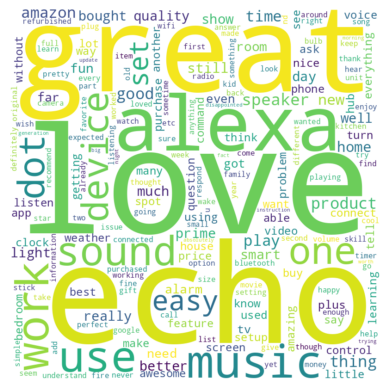

In [10]:
#Create a cloud of words upon their frequency: We will use two libraries wordcloud and matplotlib.

common_words=''

for i in data.verified_reviews:
    i = str(i)
    word = i.split()
    common_words += " ".join(word)+" "
print(common_words)


wordcloud = wordcloud.WordCloud(width = 800, height = 800, background_color='white', min_font_size=10, collocations=False).generate(common_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3-4. Tokenization and Vectorization

In [11]:
#Let breakdown each news into words: We will need to import Tokanizer library and keras.
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data['verified_reviews'].values)
X = tokenizer.texts_to_sequences(data['verified_reviews'].values)

#print the news tokes-vectors.
print("number of rows:{}\nnumber of columns: {}".format(len(X),len(X[0])))
X[0:5]

number of rows:3150
number of columns: 2


[[1, 2],
 [172],
 [181, 99, 229, 468, 4, 287, 42, 469, 379, 6, 57, 68, 62, 252, 20],
 [89, 36, 45, 136, 94, 62, 21, 253, 6, 66, 11, 99, 5, 34],
 [5]]

In [12]:
#The length of our tokenized data are not even, lets set each text with the same length.
X = pad_sequences(X)

#print the news tokes-vectors.
print("number of rows:{}\nnumber of columns: {}".format(len(X),len(X[0])))
X[0:5]

number of rows:3150
number of columns: 165


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   


## 5-6. Embedding and Building our Model

In [13]:
# Define variable to store sentiment labels
Y = data['sentiment']

# Using LabelEncoding: this method will turn the sentiment values into numerical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Turning labels into categorical values
Y_one_hot = to_categorical(Y_encoded)

In [14]:

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y_one_hot, test_size=0.20, random_state=42)

# Check the number of unique classes
num_classes = len(np.unique(Y_encoded))
print("Number of unique classes:", num_classes)


Number of unique classes: 2


In [15]:
# Define model
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=120, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
#model.add(Flatten())
#model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [16]:
# Printing model configuration
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 165, 120)          60000     
                                                                 
 spatial_dropout1d (Spatial  (None, 165, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269442 (1.03 MB)
Trainable params: 269442 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
# compile the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train,y_train, epochs=5, batch_size=32, verbose='auto')

Epoch 1/5
79/79 [==============================] - 77s 854ms/step - loss: 0.2982 - accuracy: 0.9123
Epoch 2/5
79/79 [==============================] - 57s 713ms/step - loss: 0.2031 - accuracy: 0.9262
Epoch 3/5
79/79 [==============================] - 58s 741ms/step - loss: 0.1579 - accuracy: 0.9377
Epoch 4/5
79/79 [==============================] - 57s 719ms/step - loss: 0.1268 - accuracy: 0.9528
Epoch 5/5
79/79 [==============================] - 56s 704ms/step - loss: 0.0949 - accuracy: 0.9611


In [18]:
# Evaluate the model using the accuracy metric
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.919


In [19]:
sentiment_prediction = model.predict(X_test)
predicted_inverse = np.argmax(sentiment_prediction, axis=1)
y_test_inverse = np.argmax(y_test, axis=1)


20/20 [==============================] - 2s 94ms/step


In [20]:
target_name = ["Class {}".format(i) for i in range(2)]

print(classification_report(y_test_inverse,predicted_inverse,target_names=target_name))


              precision    recall  f1-score   support

     Class 0       0.59      0.38      0.46        58
     Class 1       0.94      0.97      0.96       572

    accuracy                           0.92       630
   macro avg       0.77      0.68      0.71       630
weighted avg       0.91      0.92      0.91       630



#Client Program


In [21]:
def preprocess_review(review):
    #stop_words = set(stopwords.words('english'))
    review = re.sub(r'\d+|\W', ' ', str(review).lower())
    review = ' '.join(word for word in review.split() if word not in stopwords_list)
    return review

In [22]:
def vectorize_review(review):
    review = preprocess_review(review)
    review_sequence = tokenizer.texts_to_sequences([review])
    review_vector = pad_sequences(review_sequence, maxlen=X.shape[1])
    return review_vector


In [23]:
def predict_sentiment(review_vector):
    predicted_class = np.argmax(model.predict(review_vector))
    return label_encoder.classes_[predicted_class]


In [28]:
user_review = input("Enter a review: ")
review_vector = vectorize_review(user_review)
predicted_sentiment = predict_sentiment(review_vector)
print("Predicted Sentiment:", predicted_sentiment)


Enter a review: I've already returned it
1/1 [==============================] - 0s 88ms/step
Predicted Sentiment: 0
